<a href="https://colab.research.google.com/github/scott-huberty/UCSD/blob/main/Copy_of_experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive notebook for UCSD analyses.
 Feel free to run, play around with and add code as you wish, the notebook is not precious!
 - You can view the output as is or run the cells for yourself.
 - Just make sure to run them sequentially if you do
 - a few tricks: after selecting a cell, you can press `shift+enter` to run the cell instead of clicking the play button

In [1]:
# importing libraries to be used
import xarray as xr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# importing Google Drive to access folder with data
# Make sure you added "notebooks" to your drive: right click, "add to drive"
from google.colab import drive
try:
  drive.mount("/content/drive") # Don't change this.
except: 'drive already mounted'

my_path = "/notebooks/ucsd/" # path to data
gdrive_path = "/content/drive" + "/My Drive" + my_path # Change according to your locale, if neeeded.

#nb_path = '/content/notebooks'
#try:
#  os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
#except: 'file exists'
#sys.path.append(nb_path)'''


Mounted at /content/drive


In [2]:
# Defining a few ROI's.
roi = ['E6', 'E7', 'E13', 'E106', 'E112', 'E129']

frontal_roi = ['E18','E19','E23','E24','E27','E3',
               'E4','E10','E118','E123','E124']

posterior_roi = ['E58','E59','E65', 'E66', 'E67',
                 'E69', 'E70', 'E71', 'E72','E73',
                 'E74', 'E75', 'E76', 'E77','E81',
                 'E82', 'E83', 'E84','E88', 'E89',
                 'E90', 'E91', 'E96']

In [3]:
# defining a plotting function that we will re-use
def pac_plot_by_condition(dataset, roi=roi, vmax=0.0015):
  ''''returns: 
            a plot of the alpha-gamma pac for each condition
      parameters:
          dataset (xarray data_array): The PAC array that you want to plot.
          roi (list): channels that you want to include
          vmax (int): maximum value to anchor the heatmap. adjust as needed.'''

  
  # define the figure canvas..
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),
                            sharex=True, sharey=True)
  fig.patch.set_facecolor((.32, .33, .36)) # canvas background colour

  # Loop over conditions..
  conditions = enumerate(['video_only','audio_only','sync_av','async_av'])
  for index, condition in tqdm(conditions, total=4, desc='plotting... '): 
    
    # load, prep, and plot data..
    (dataset.sel(channel=roi, condition=condition)
            .mean(['ID','channel'])
            .squeeze()
            .plot(ax=axes.flatten()[index],vmax=vmax))

  # ajdust borders...
  plt.tight_layout()
  # show the plot
  return plt.show()


# <b>Average Reference.</b>
<br>
Heatmaps of Alpha to Gamma coupling. 

- X axis is time across the averaged 2 second Epochs.
- Y axis is gamma frequency
- There is one plot for each Condition.

In [4]:
# Loading Dataframe of Phase-Amplitude Coupling Values
# fyi ds stands for dataset
ds_avg = xr.open_mfdataset(f'{gdrive_path}experiment1/run1_avgref/*.nc').to_array(name='erpac')
ds_avg

,Array,Chunk
Bytes,2.09 GB,90.90 MB
Shape,"(1, 23, 4, 129, 20, 1101)","(1, 1, 4, 129, 20, 1101)"
Count,92 Tasks,23 Chunks
Type,float64,numpy.ndarray


plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

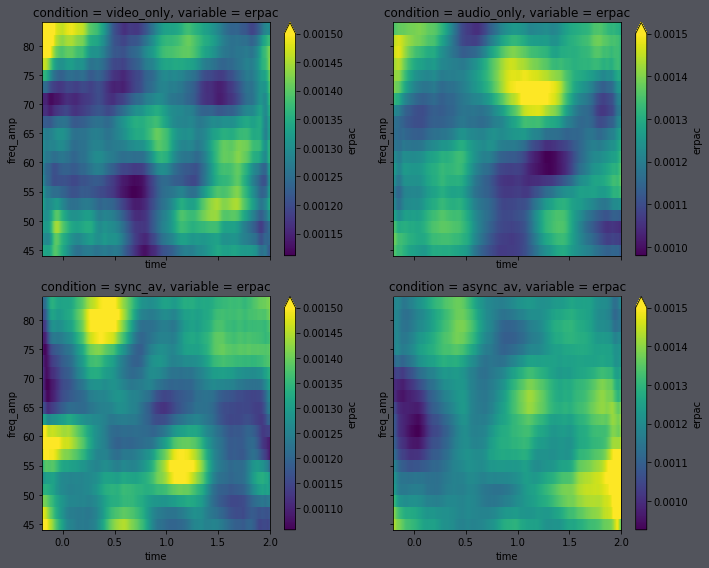

In [5]:
# hang tight, takes about 1 minute to run...
pac_plot_by_condition(ds_avg)

# <b>Laplacian Reference.</b>
<br>
A Laplacian (Current Source Density; CSD) Reference is a local reference method that reduces effects of volume conuction and may be preferable:

See: [Article discussing CSD](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4610715/)

And: [Paper by co-advisor that also discusses the effects of reference type](https://www.biorxiv.org/content/10.1101/2021.05.19.444800v1.abstract)

Heatmaps of Alpha to Gamma coupling. 

- X axis is time across the averaged 2 second Epochs.
- Y axis is gamma frequency
- There is one plot for each Condition.



In [6]:
# Loading Dataset that used a CSD ref
ds_csd = xr.open_mfdataset(f'{gdrive_path}experiment1/run2_csdref/*.nc').to_array(name='erpac')
ds_csd

,Array,Chunk
Bytes,2.09 GB,90.90 MB
Shape,"(1, 23, 4, 129, 20, 1101)","(1, 1, 4, 129, 20, 1101)"
Count,92 Tasks,23 Chunks
Type,float64,numpy.ndarray


plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

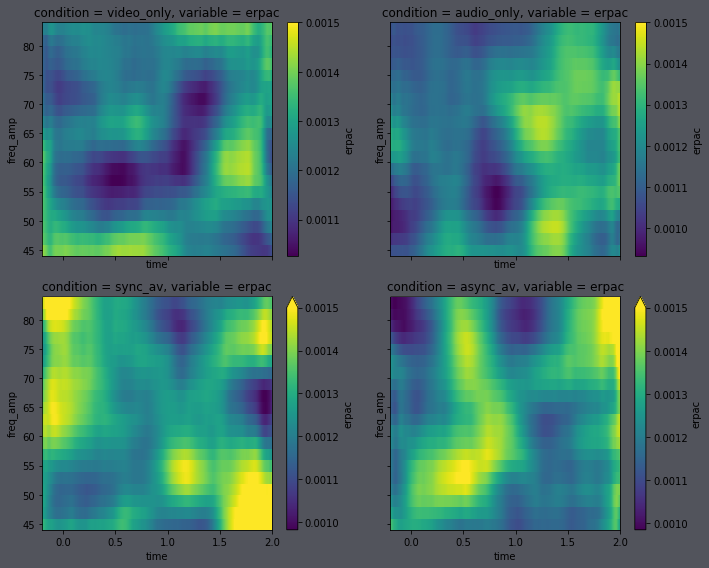

In [7]:
pac_plot_by_condition(ds_csd)

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

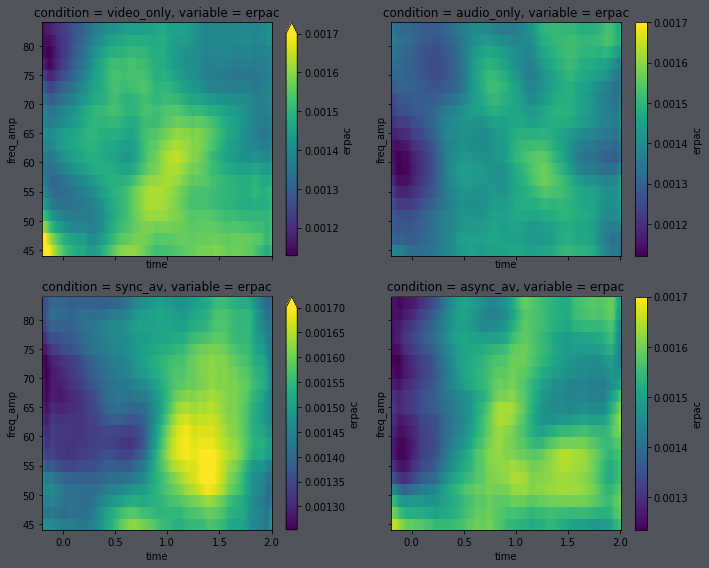

In [ ]:
# Checking Out the PAC over a posterior Region Using CSD REF..
pac_plot_by_condition(ds_csd, roi=posterior_roi, vmax=0.0017)

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

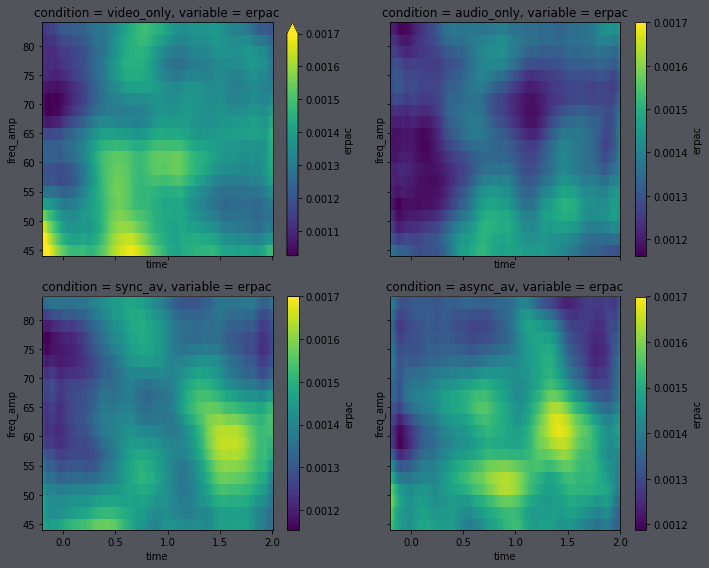

In [ ]:
# Now seeing what it looks like with an Avg Ref
pac_plot_by_condition(ds_avg, roi=posterior_roi, vmax=0.0017)